In [1]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt


gdrive_path = '/content/gdrive/MyDrive/Robust DevOps: Chiemsee/sorted-results'
gdrive_path_root = '/content/gdrive/MyDrive/Robust DevOps: Chiemsee'

graphs_folder = os.path.join(gdrive_path_root, 'graphs')


# This will mount your Google Drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [2]:
column_names = [
    "noise_type",
    "positive",
    "ratio_positive",
    "negative",
    "ratio_negative",
    "zero",
    "ratio_zero"
]

# Get a list of CSV files in the directory
csv_files = [file for file in os.listdir(gdrive_path) if file.endswith('.csv')]

# Read the first CSV file as the base dataframe (alpine_df)
csv_path = os.path.join(gdrive_path, 'alpine.csv')
sum_df = pd.read_csv(csv_path, names=column_names, skiprows=1)

# Iterate over the remaining CSV files and add their data to sum_df
for csv_file in csv_files:
    if csv_file != 'alpine.csv':
        csv_path = os.path.join(gdrive_path, csv_file)
        df = pd.read_csv(csv_path, names=column_names, skiprows=1)
        sum_df = sum_df.groupby('noise_type').sum() + df.groupby('noise_type').sum()

# Reset the index to make "noise_type" a column
sum_df = sum_df.reset_index()

# Display the resulting dataframe
sum_df



,noise_type,positive,ratio_positive,negative,ratio_negative,zero,ratio_zero
0,cpu_high,88.0,60.69,52.0,25.19,1590.0,1114.11
1,cpu_low,79.0,67.00,69.0,32.68,1582.0,1100.32
2,cpu_medium,107.0,68.11,25.0,13.53,1598.0,1118.36
3,io_high,43.0,46.17,105.0,49.13,1582.0,1104.68
4,io_low,57.0,39.37,93.0,50.84,1580.0,1109.79
5,io_medium,71.0,61.74,67.0,29.06,1592.0,1109.19
6,netbandwidth_high,25.0,32.00,114.0,63.65,1591.0,1104.36
7,netbandwidth_low,35.0,14.82,101.0,59.90,1594.0,1125.27
8,netbandwidth_medium,17.0,19.33,115.0,62.51,1598.0,1118.17
9,netdelay_high,238.0,112.83,115.0,59.58,1377.0,1027.59


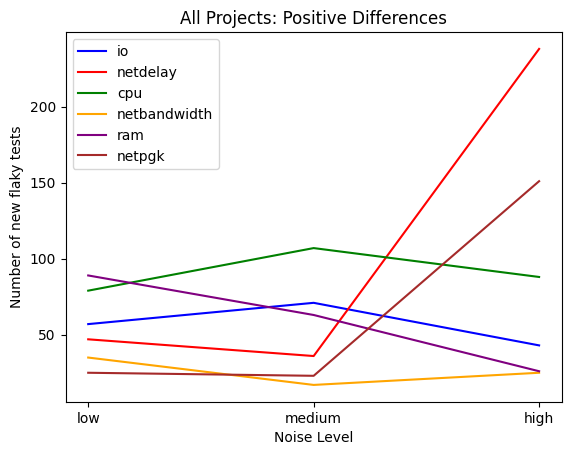

In [3]:
def create_line_plot(sum_df):
  color_dict = {
          "io": "blue",
          "netdelay": "red",
          "cpu": "green",
          "netbandwidth": "orange",
          "ram": "purple",
          "netpgk": "brown"
      }

      # line plot for positive differences with grouped colors
  for noise_type, color in color_dict.items():
      filtered_df = sum_df[sum_df["noise_type"].apply(lambda x: str(x).split("_")[0] == noise_type)]
      sorted_df = filtered_df.sort_values("noise_type", key=lambda x: x.map({noise_type + "_low": 0, noise_type+ "_medium": 1, noise_type + "_high": 2}))
      plt.plot(["low", "medium", "high"], sorted_df["positive"], color=color, label=noise_type)

  plt.xlabel("Noise Level")
  plt.ylabel("Number of new flaky tests")
  plt.title("All Projects: Positive Differences")
  plt.legend()

  # Save the positive graph
  positive_filename = "allprojects_positive.png"
  positive_filepath = os.path.join(graphs_folder, positive_filename)
  plt.savefig(positive_filepath)

  plt.show()

create_line_plot(sum_df)


In [ ]:
def create_bar_plot(sum_df,file_name):
  filtered_df = sum_df[sum_df["noise_type"].str.contains("high")]
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")
  plt.bar(filtered_df["noise_type"], filtered_df["positive"])

  # Customize the plot
  plt.xlabel("Noise Type")
  plt.ylabel("Number of new flaky tests")
  if(file_name.endswith('.csv')):
    file_name=file_name[:-4]
  plt.title(f"flakiness by Noise Type for {file_name}")

  # Rotate the x-axis labels for better visibility if needed
  plt.xticks(rotation=45)

  # Save the graph
  filename = file_name.replace(" ", "") + "_bar.png"
  filepath = os.path.join(graphs_folder, filename)
  print(f"Saving {filename}")
  plt.savefig(filepath, bbox_inches = 'tight')

  # Display the plot
  plt.show()



<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving allprojects_bar.png


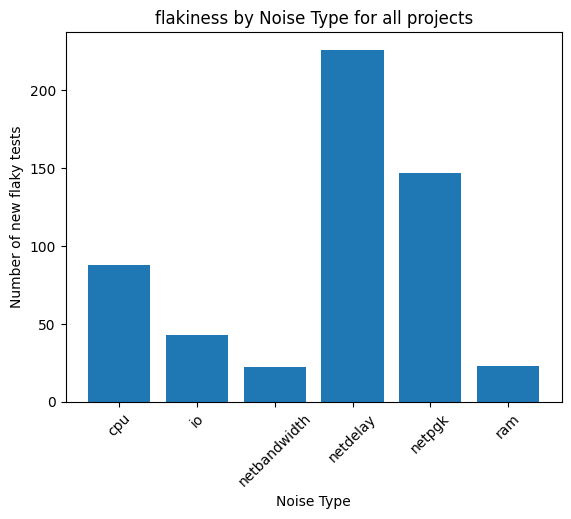

In [ ]:
create_bar_plot(sum_df, "all projects")

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving alpine_bar.png


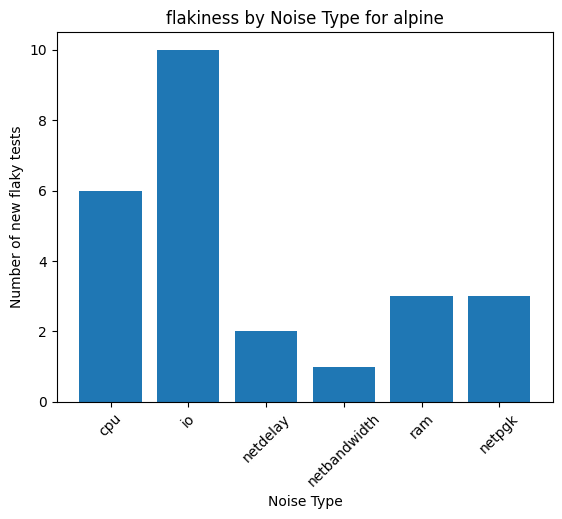

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving aos_bar.png


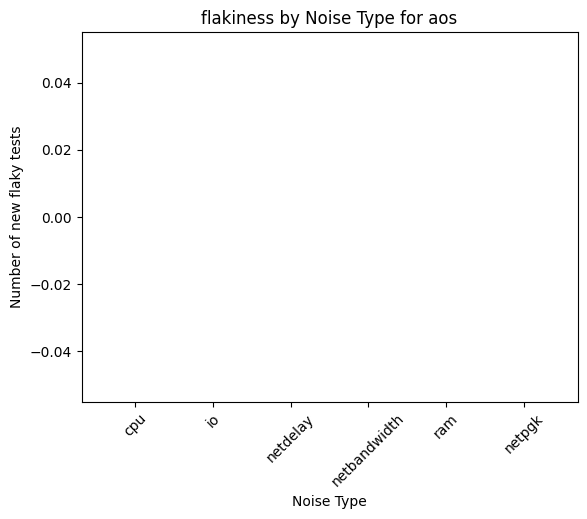

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving bulma_bar.png


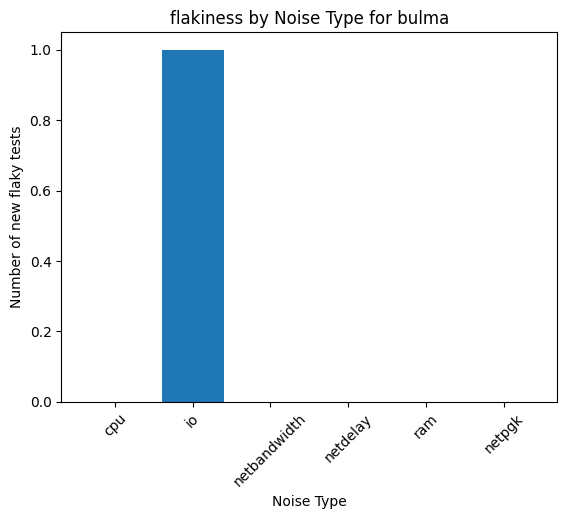

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving gatsby_bar.png


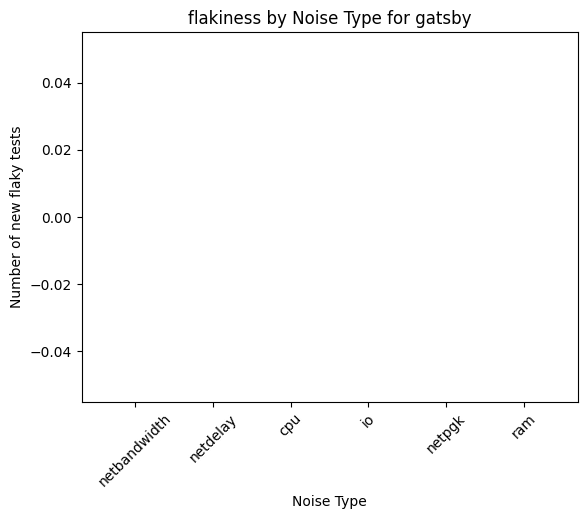

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving ionic_bar.png


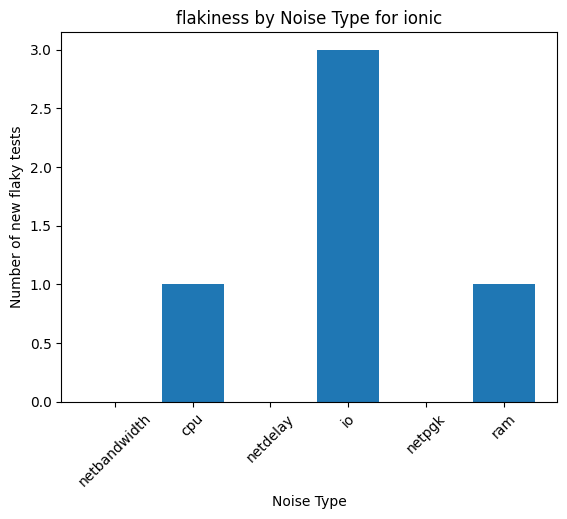

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving react-beautiful-dnd_bar.png


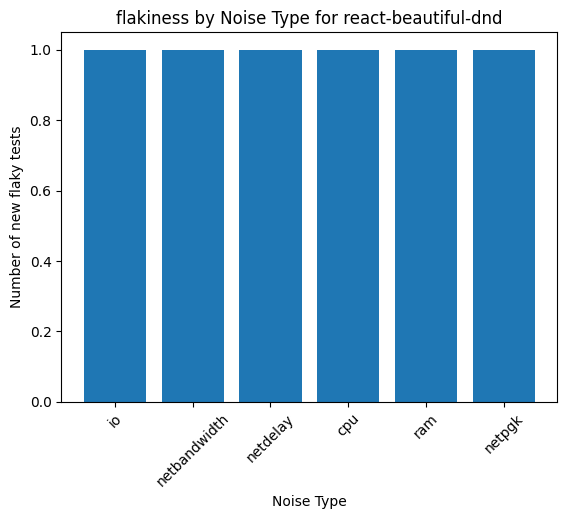

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving react-hook-form_bar.png


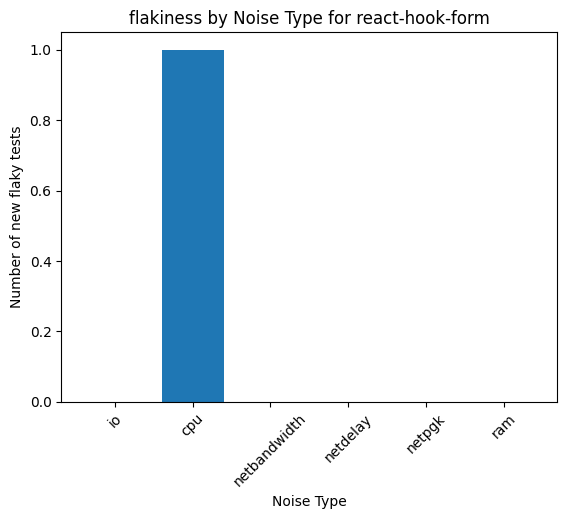

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving uppy_bar.png


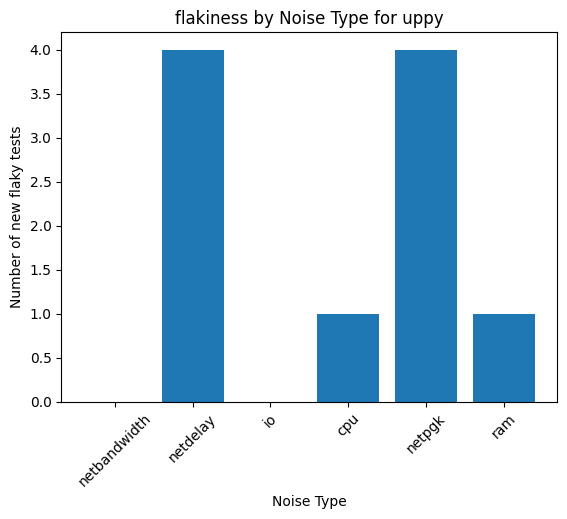

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving vuecli_bar.png


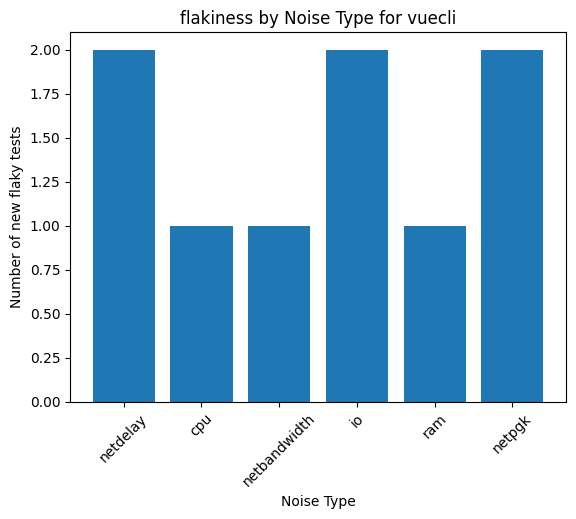

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving n8n_bar.png


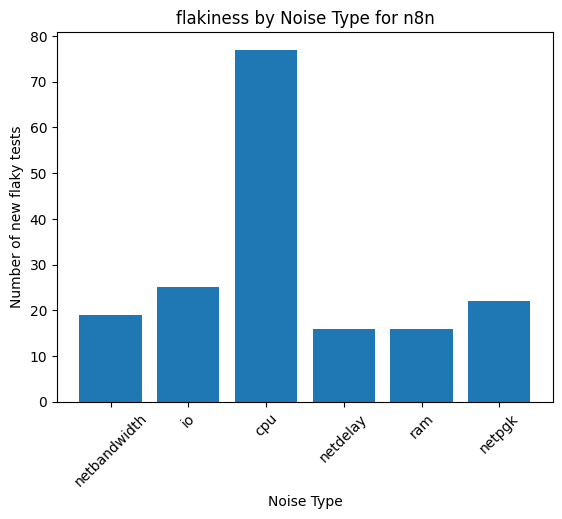

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving mermaid_bar.png


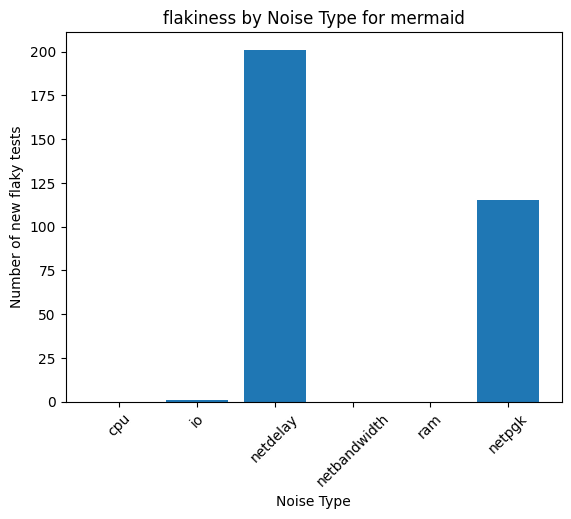

<ipython-input-4-b031d5f98042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["noise_type"] = filtered_df["noise_type"].str.replace("_high", "")


Saving FreeCodeCamp_bar.png


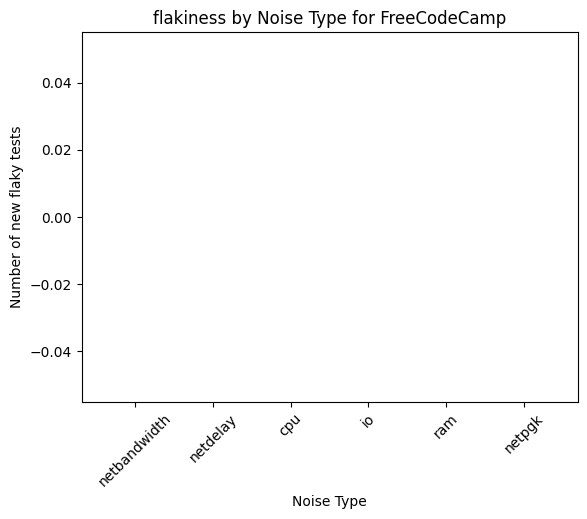

In [ ]:
csv_files = [file for file in os.listdir(gdrive_path) if file.endswith('.csv')]
for csv_file in csv_files:
    csv_path = os.path.join(gdrive_path, csv_file)
    df = pd.read_csv(csv_path, names=column_names, skiprows=1)
    create_bar_plot(df,csv_file)

In [4]:
import matplotlib.pyplot as plt

def create_stacked_bar_plot(sum_df, file_name):
    # Extract noise types and intensities from the noise_type column
    sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str

    # Group the DataFrame by noise_type and intensity and calculate the sum of positive values
    grouped_df = sum_df.groupby(['noise_type', 'intensity'])['positive'].sum().unstack()

    # Define the intensities to be used in the stacked bar chart
    intensities = ['low', 'medium', 'high']

    # Reorder the columns of grouped_df to match the desired intensity order
    grouped_df = grouped_df.reindex(columns=intensities)

    # Create a stacked bar chart
    grouped_df.plot.bar(stacked=True)

    # Customize the plot
    plt.xlabel("Noise Type")
    plt.ylabel("Number of New Flaky Tests")

    if file_name.endswith('.csv'):
        file_name = file_name[:-4]

    plt.title(f"Flakiness by Noise Type for {file_name}")
    plt.xticks(rotation=45)
    plt.legend()

    # Save the graph
    filename = file_name.replace(" ", "") + "_stackedbar.png"
    filepath = os.path.join(graphs_folder, filename)
    print(f"Saving {filename}")
    plt.savefig(filepath, bbox_inches = 'tight')

    # Display the plot
    plt.show()


<ipython-input-4-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-4-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving allprojects_stackedbar.png


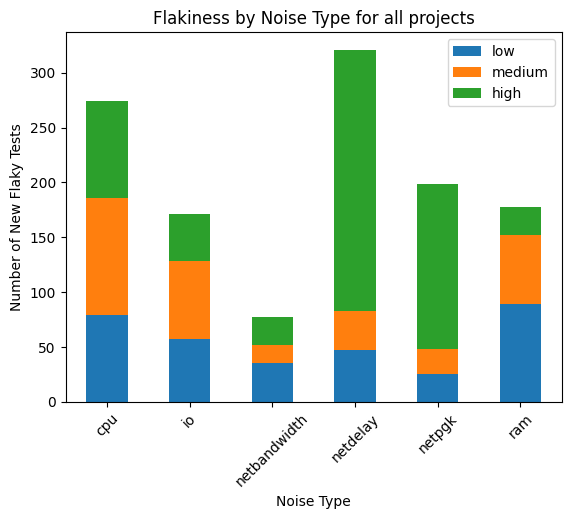

In [5]:
create_stacked_bar_plot(sum_df, "all projects")

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving alpine_stackedbar.png


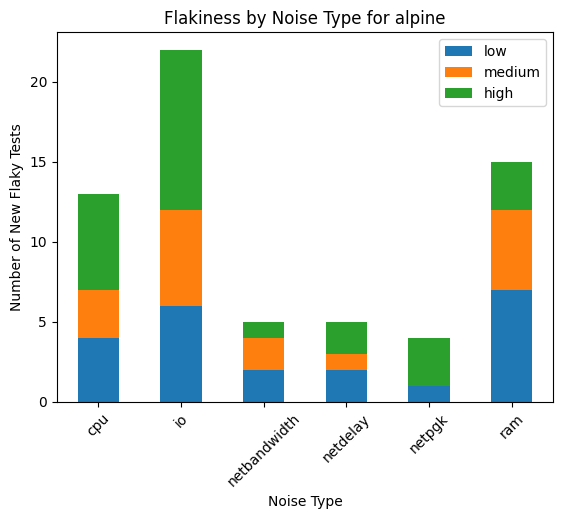

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving aos_stackedbar.png


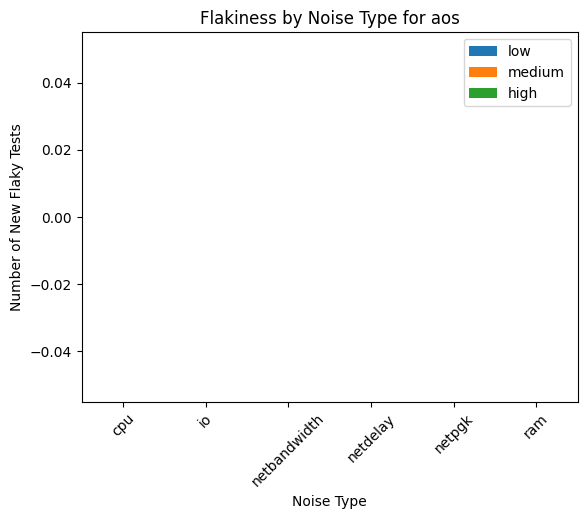

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving bulma_stackedbar.png


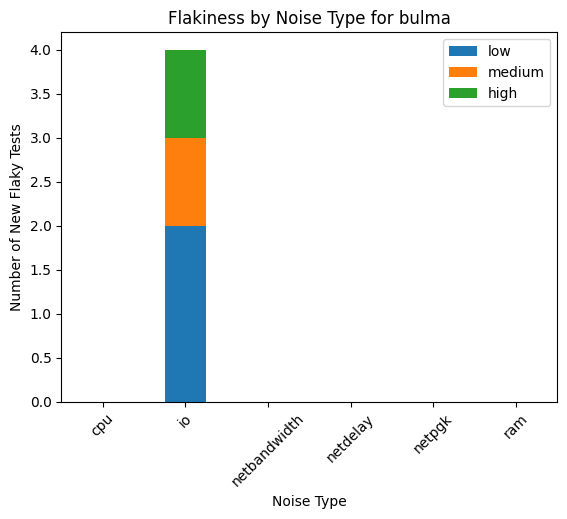

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving gatsby_stackedbar.png


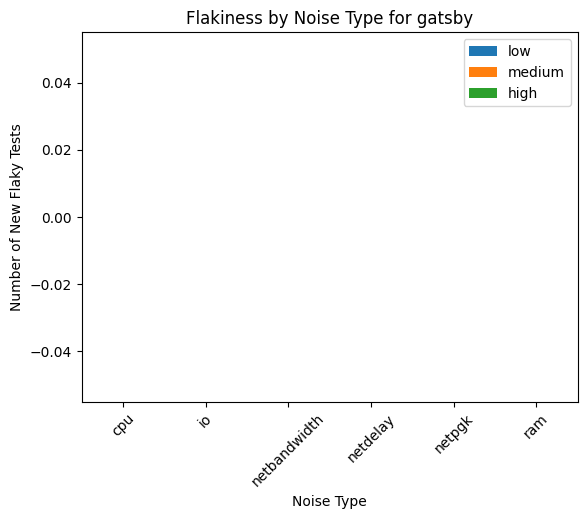

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving ionic_stackedbar.png


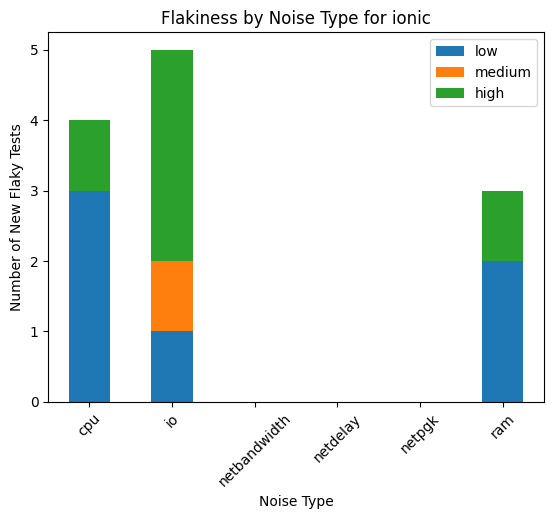

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving react-beautiful-dnd_stackedbar.png


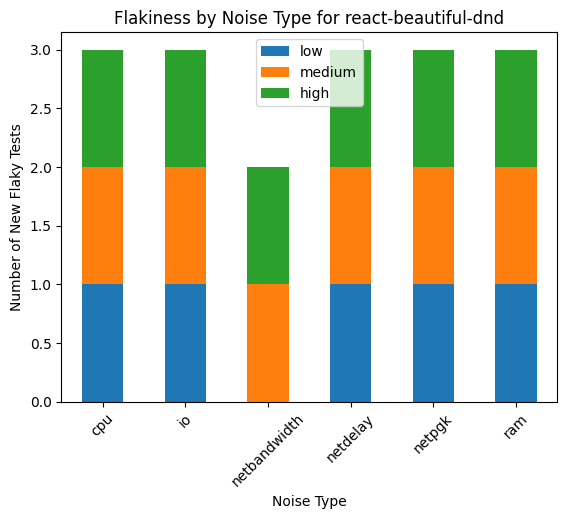

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving react-hook-form_stackedbar.png


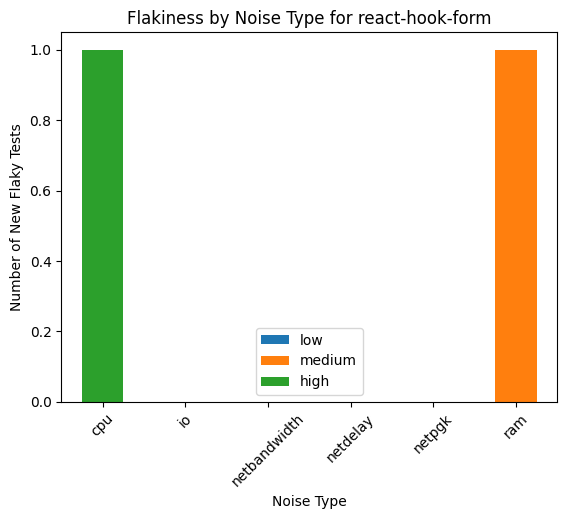

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving uppy_stackedbar.png


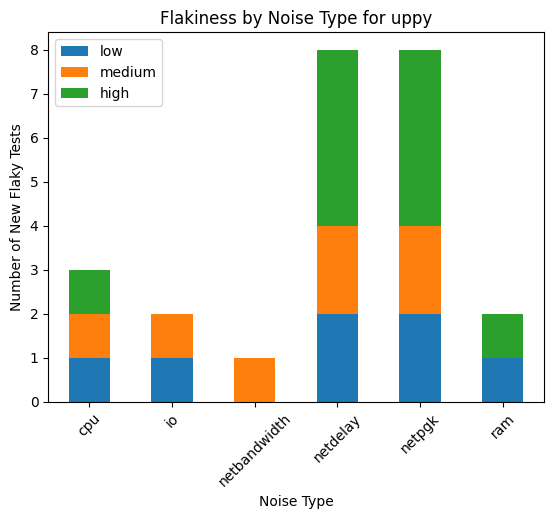

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving vuecli_stackedbar.png


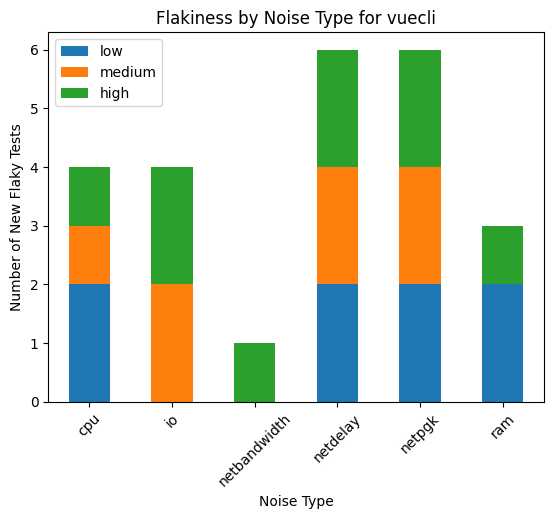

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving n8n_stackedbar.png


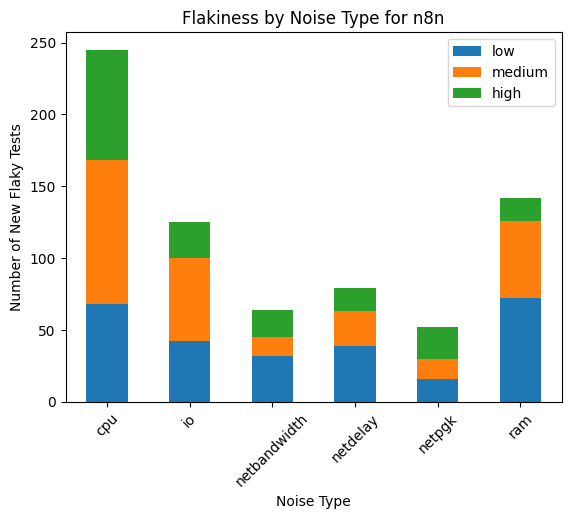

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving mermaid_stackedbar.png


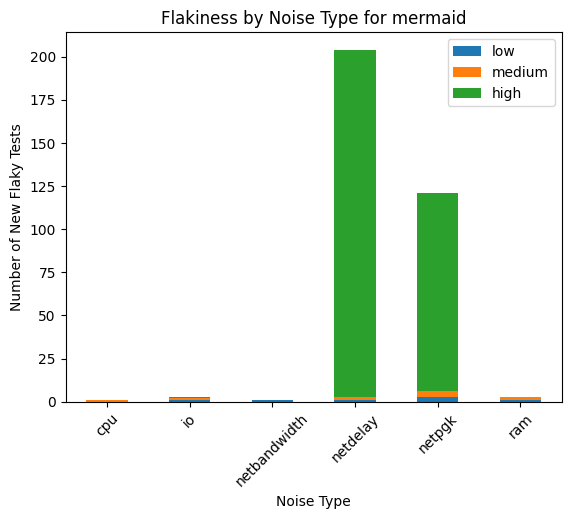

<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str
<ipython-input-7-7d86d55ec8c7>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sum_df['noise_type'], sum_df['intensity'] = sum_df['noise_type'].str.split('_', 1).str


Saving FreeCodeCamp_stackedbar.png


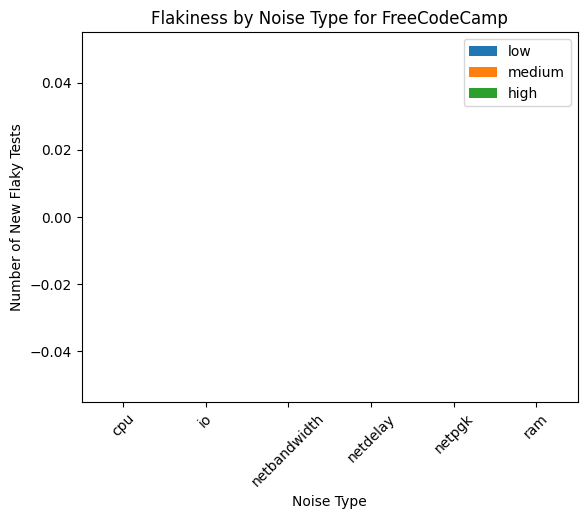

In [ ]:
csv_files = [file for file in os.listdir(gdrive_path) if file.endswith('.csv')]
for csv_file in csv_files:
    csv_path = os.path.join(gdrive_path, csv_file)
    df = pd.read_csv(csv_path, names=column_names, skiprows=1)
    create_stacked_bar_plot(df,csv_file)